In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

pwt = pd.read_excel("./pwt1001.xlsx", sheet_name="Data")

In [274]:
pwt.describe()

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,12810.000000,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7090.000000
mean,1984.500000,3.048523e+05,3.070802e+05,30.962982,14.171167,1986.923200,2.087200,2.249465e+05,3.049463e+05,3.061396e+05,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.364398,1.417965
std,20.205986,1.214332e+06,1.218457e+06,116.189454,58.056973,284.003338,0.727413,8.882343e+05,1.236095e+06,1.226056e+06,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435907,2.078080
min,1950.000000,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.014431,0.067465
25%,1967.000000,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478805,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.171785,0.691959
50%,1984.500000,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.300982,1.000000
75%,2002.000000,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.453684,1.511751
max,2019.000000,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.694918,34.340618


In [275]:
pwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12810 non-null  object 
 1   country        12810 non-null  object 
 2   currency_unit  12810 non-null  object 
 3   year           12810 non-null  int64  
 4   rgdpe          10399 non-null  float64
 5   rgdpo          10399 non-null  float64
 6   pop            10399 non-null  float64
 7   emp            9529 non-null   float64
 8   avh            3492 non-null   float64
 9   hc             8637 non-null   float64
 10  ccon           10399 non-null  float64
 11  cda            10399 non-null  float64
 12  cgdpe          10399 non-null  float64
 13  cgdpo          10395 non-null  float64
 14  cn             10314 non-null  float64
 15  ck             7090 non-null   float64
 16  ctfp           6407 non-null   float64
 17  cwtfp          6407 non-null   float64
 18  rgdpna

In [276]:
pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

## Annual average labour share over time

In [277]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
pwt_labsh_avg = pwt[["year", "labsh"]].groupby(["year"]).mean()

In [279]:
pwt_labsh_avg.reset_index(inplace=True)
pwt_labsh_avg["5y_ma"] = pwt_labsh_avg["labsh"].rolling(window=5).mean()

/var/folders/mh/f7pm6fzn655fqkxvm3d_gcq80000gn/T/ipykernel_32531/354134974.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_ticks, fontfamily='PT Serif')


(1950.0, 2019.0)

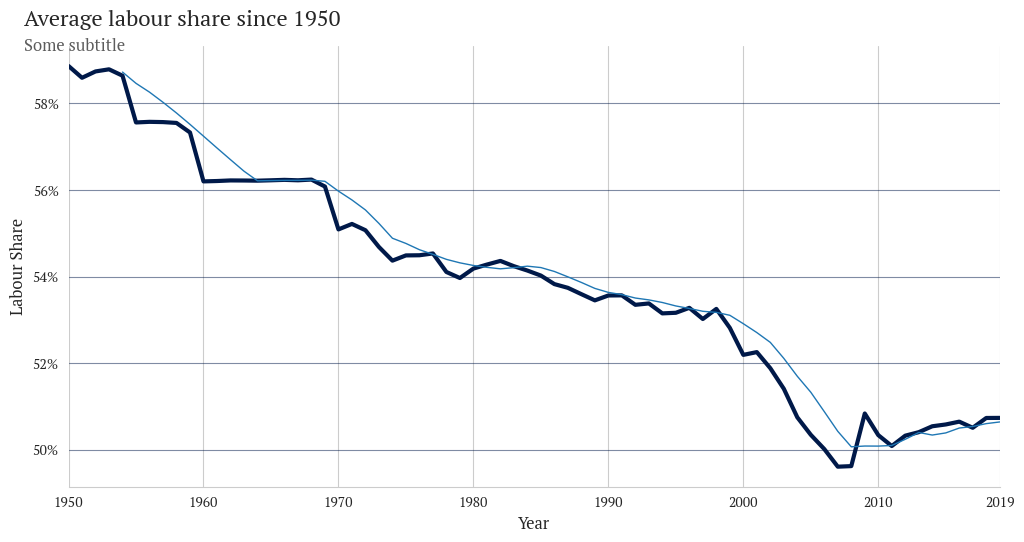

In [280]:
fig, ax = plt.subplots(figsize=(10, 5))

fig.text(0, 1, "Average labour share since 1950", fontsize=16, fontfamily='PT Serif')
fig.text(0, 0.95, "Some subtitle", fontsize=12, alpha=0.75, fontfamily='PT Serif')

fig.tight_layout()

ax.set_xlabel("Year", fontfamily='PT Serif', fontsize=12)
ax.set_ylabel("Labour Share", fontfamily='PT Serif', fontsize=12)

ax.plot(pwt_labsh_avg["year"], pwt_labsh_avg["labsh"], color='#001949', linewidth=3, label="Labour Share")
ax.plot(pwt_labsh_avg["year"], pwt_labsh_avg["5y_ma"], linewidth=1, label="5-year moving average")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.grid(True, color='#001949', alpha=0.5)

xticks = np.arange(1950, 2020, 10)
xticks = np.append(xticks, 2019)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontfamily='PT Serif')

y_ticks = [f"{round((tick*100),2).astype(int)}%" for tick in ax.get_yticks()]

ax.set_yticklabels(y_ticks, fontfamily='PT Serif')

ax.set_xlim(left=pwt_labsh_avg["year"].min(), right=pwt_labsh_avg["year"].max())

In [281]:
pwt_labsh = pwt[["year", "countrycode", "labsh"]]

<Axes: >

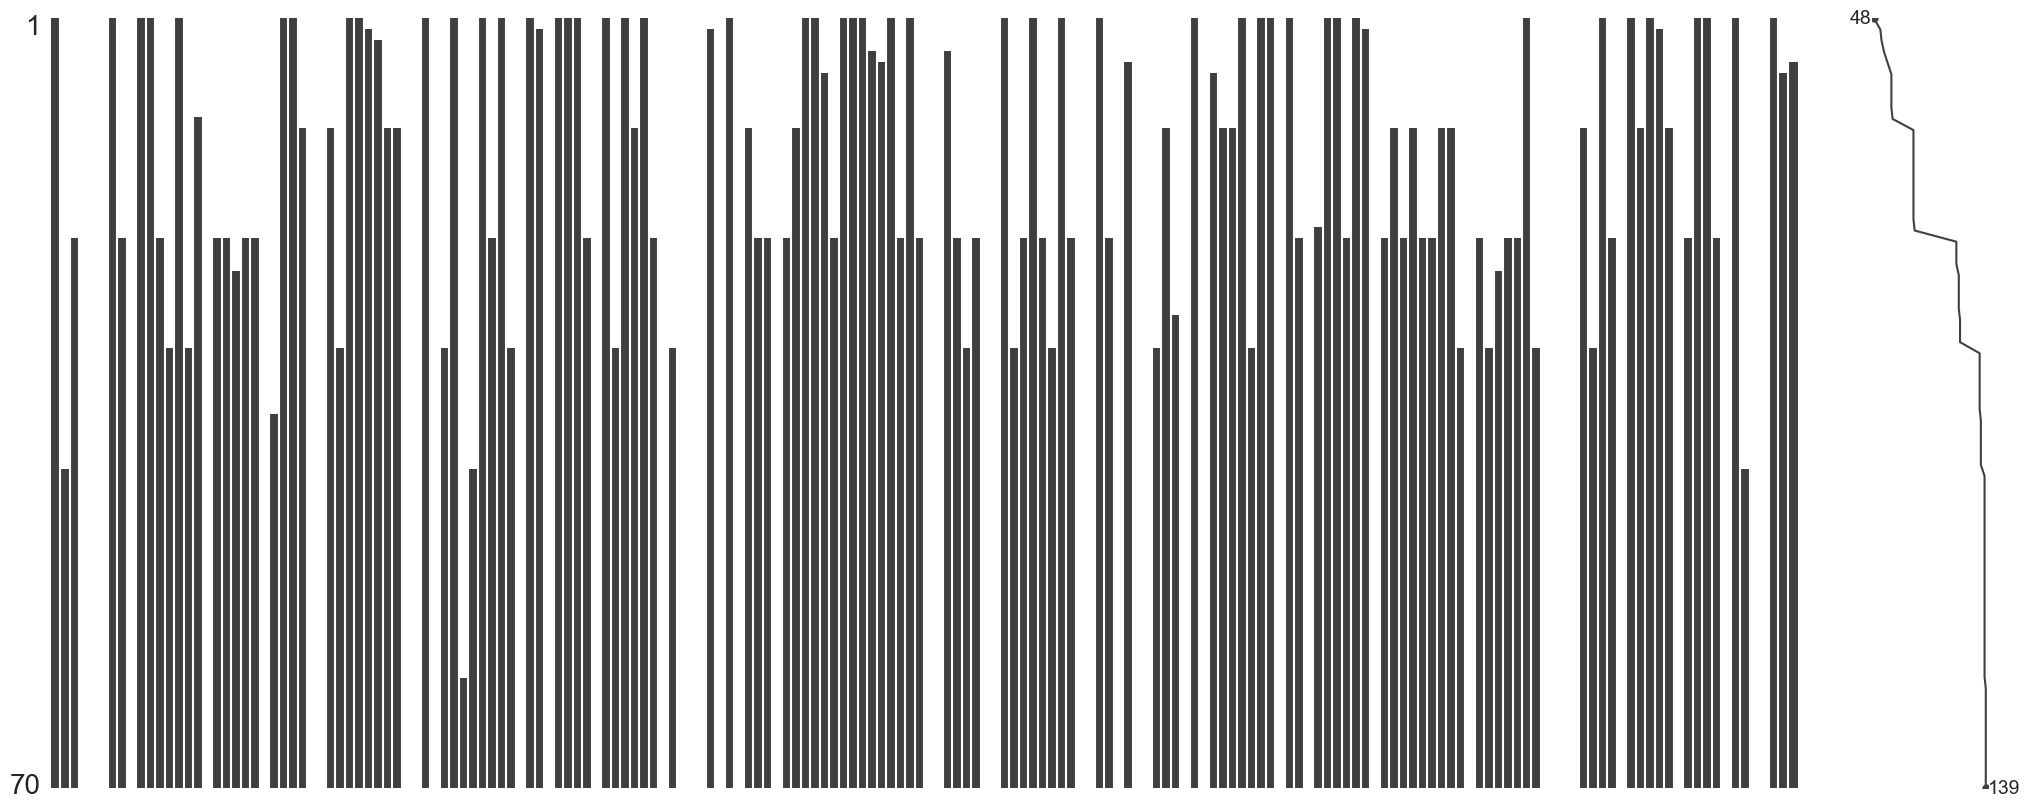

In [282]:
pwt_labsh_pivoted = pwt_labsh.pivot(index="year", columns="countrycode", values="labsh")
pwt_labsh_pivoted.reset_index(inplace=True)
pwt_labsh_pivoted
msno.matrix(pwt_labsh_pivoted)

In [310]:
# get the median and standard deviation of the labour share each year:
median = pwt_labsh.groupby("year")["labsh"].median()
std_error = pwt_labsh.groupby("year")["labsh"].std()

counts = pwt_labsh.groupby("year")["labsh"].count()
percentage_counts = round((counts / pwt_labsh["countrycode"].nunique()) * 100, 2).astype(int)
percentage_counts

year
1950    25
1951    28
1952    28
1953    30
1954    31
        ..
2015    75
2016    75
2017    75
2018    75
2019    75
Name: labsh, Length: 70, dtype: int64

/var/folders/mh/f7pm6fzn655fqkxvm3d_gcq80000gn/T/ipykernel_32531/3122332577.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_ticks, fontfamily='PT Serif')


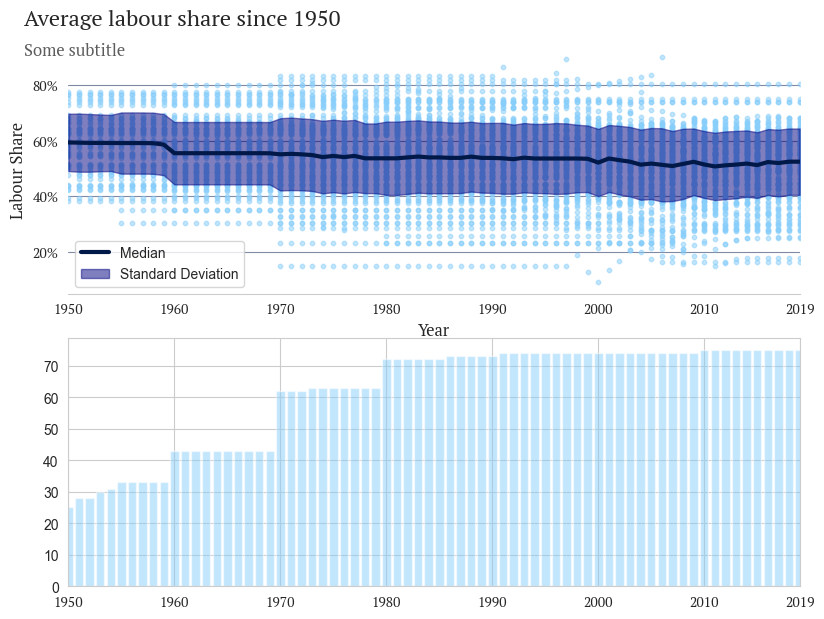

In [313]:
fig, (ax, ax2) = plt.subplots(2,1,figsize=(8, 6))

fig.text(0, 1, "Average labour share since 1950", fontsize=16, fontfamily='PT Serif')
fig.text(0, 0.95, "Some subtitle", fontsize=12, alpha=0.75, fontfamily='PT Serif')

fig.tight_layout()

ax.set_xlabel("Year", fontfamily='PT Serif', fontsize=12)
ax.set_ylabel("Labour Share", fontfamily='PT Serif', fontsize=12)

ax.scatter(pwt_labsh["year"], pwt_labsh["labsh"], color='lightskyblue', alpha=0.5, s=10)
ax.plot(median, label="Median", color='#001949', linewidth=3)
ax.fill_between(std_error.index, median - std_error, median + std_error, label="Standard Deviation", color='navy', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.grid(False)
ax.yaxis.grid(True, color='#001949', alpha=0.5)

xticks = np.arange(1950, 2020, 10)
xticks = np.append(xticks, 2019)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontfamily='PT Serif')

y_ticks = [f"{round((tick*100),2).astype(int)}%" for tick in ax.get_yticks()]

ax.set_yticklabels(y_ticks, fontfamily='PT Serif')

ax.set_xlim(left=pwt_labsh_avg["year"].min(), right=pwt_labsh_avg["year"].max())
ax.legend()

ax2.bar(percentage_counts.index, percentage_counts, color='lightskyblue', alpha=0.5)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks, fontfamily='PT Serif')
ax2.set_xlim(left=pwt_labsh_avg["year"].min(), right=pwt_labsh_avg["year"].max())

plt.show()

In [318]:
moon_heading = '#EEE8D5'
moon_blue = '#012B36'  # Deep blue
moon_accent = '#2082C3'  # Lighter blue accent
moon_text = '#94A0A1'  # Grey

/var/folders/mh/f7pm6fzn655fqkxvm3d_gcq80000gn/T/ipykernel_32531/1412513078.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(y_ticks1)


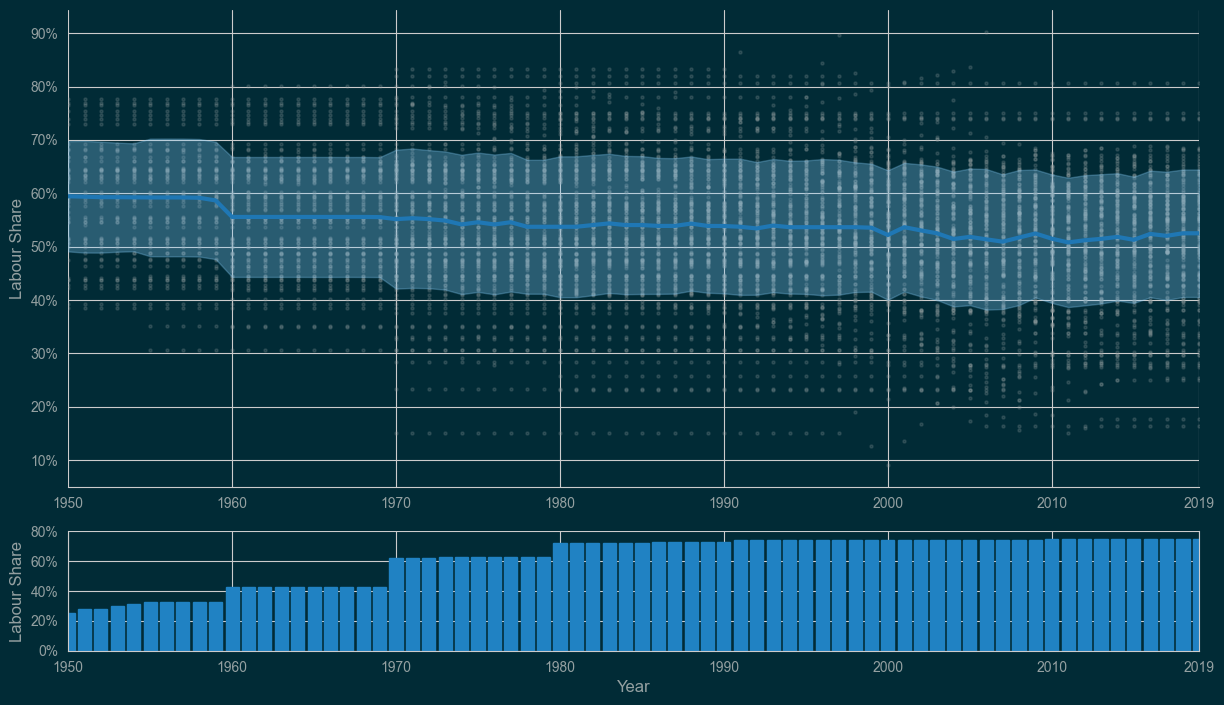

In [358]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 7), gridspec_kw={'height_ratios': [4, 1]}, facecolor=moon_blue)

fig.tight_layout()

# Setting the facecolours
ax1.set_facecolor(moon_blue)  # Match figure background
ax1.set_ylabel("Labour Share", fontsize=12, color=moon_text)

ax2.set_facecolor(moon_blue)  # Match figure background
ax2.set_xlabel("Year", fontsize=12, color=moon_text)
ax2.set_ylabel("Labour Share", fontsize=12, color=moon_text)

# Plotting the data
ax1.scatter(pwt_labsh["year"], pwt_labsh["labsh"], color=moon_text, alpha=0.2, s=5)
ax1.plot(median, label="Median", linewidth=3)
ax1.fill_between(std_error.index, median - std_error, median + std_error, label="Standard Deviation", color='lightskyblue', alpha=0.3)

ax2.bar(percentage_counts.index, percentage_counts, color=moon_accent, edgecolor=moon_accent)

# Setting the xticks
ax1.tick_params(colors=moon_text)
ax2.tick_params(colors=moon_text)

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)

ax1.set_xlim(left=pwt_labsh_avg["year"].min(), right=pwt_labsh_avg["year"].max())
ax2.set_xlim(left=pwt_labsh_avg["year"].min(), right=pwt_labsh_avg["year"].max())

# Setting the yticks
y_ticks1 = [f"{round((tick*100),2).astype(int)}%" for tick in ax1.get_yticks()]
y_ticks2 = np.arange(0, 81, 20)

ax2.set_yticks(y_ticks2)

ax1.set_yticklabels(y_ticks1)
ax2.set_yticklabels([f"{tick}%" for tick in y_ticks2])

# Removing the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)

plt.show()